# K-Nearest Neighbors (K-NN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 01 ETL

In [2]:
dataset = pd.read_csv('../dataset/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# 02 EDA

In [3]:
dataset['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [4]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# 03 Preprocessing

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
print(X_test.dtype)

int64


In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((300, 2), (300,), (100, 2), (100,))

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #avoid data leakage

In [9]:
print(X_test.dtype)

float64


# 04 Training the K-NN model on the Training set

In [10]:
import math

class KNN:
    def __init__(self,k):
        self.k=k
        print(self.k)
        
    def fit(self,X_train,y_train):
        self.x_train=X_train
        self.y_train=y_train
        
    def calculate_euclidean(self,sample1,sample2):
        distance=0.0
        for i in range(len(sample1)):
            distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
        return math.sqrt(distance)
    
    def nearest_neighbors(self,test_sample):
        distances=[]#calculate distances from a test sample to every sample in a training set
        for i in range(len(self.x_train)):
            distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
        distances.sort(key=lambda x:x[1])#sort in ascending order, based on a distance value
        neighbors=[]
        for i in range(self.k): #get first k samples
            neighbors.append(distances[i][0])
        return neighbors
    
    def predict(self,test_set):
        predictions = []
        for test_sample in test_set:
            neighbors = self.nearest_neighbors(test_sample)
            labels = [sample for sample in neighbors]
            prediction = max(labels,key=labels.count)
            predictions.append(prediction)
            
        return predictions
  

In [11]:
model=KNN(5) #our model
model.fit(X_train,y_train)

5


In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
predictions=model.predict(X_test)#our model's predictions

## Making the Confusion Matrix to compare both models

0.93

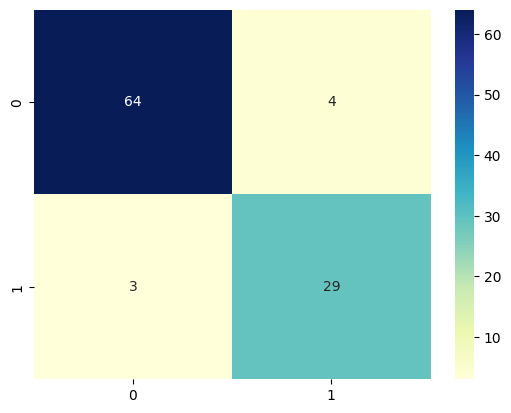

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
accuracy_score(y_test, y_pred)

0.93

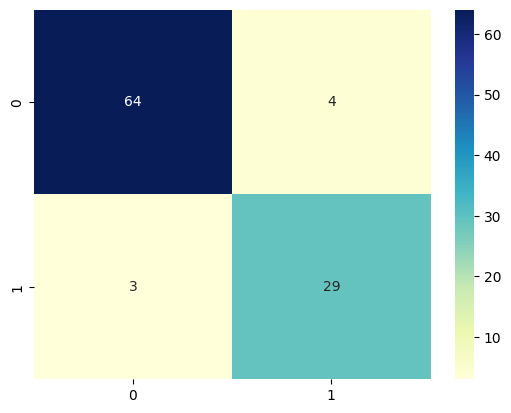

In [20]:
import seaborn as sns
cm = confusion_matrix(y_test, predictions) #our model
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
accuracy_score(y_test, predictions)

## Visualising the Test set results 

/var/folders/yg/7zr68xws2x5d3vc4nhz2l7wc0000gn/T/ipykernel_67977/2208435075.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


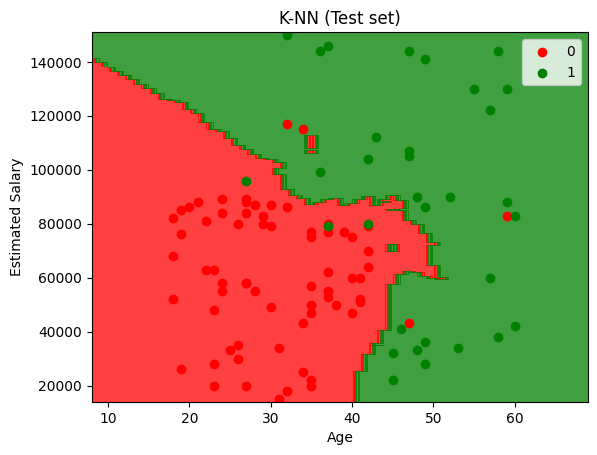

In [17]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()